In [5]:
import pandas as pd

## Load the data

In [6]:
transcript = pd.read_csv('../data/processed/transcript.csv')
transcript.head()

,person,event,time,offer id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


## General Analysis

                                  person        event           time  \
count                             306534       306534  306534.000000   
unique                             17000            4            NaN   
top     94de646f7b6041228ca7dec82adb97d2  transaction            NaN   
freq                                  51       138953            NaN   
mean                                 NaN          NaN     366.382940   
std                                  NaN          NaN     200.326314   
min                                  NaN          NaN       0.000000   
25%                                  NaN          NaN     186.000000   
50%                                  NaN          NaN     408.000000   
75%                                  NaN          NaN     528.000000   
max                                  NaN          NaN     714.000000   

                                offer id         amount        reward  
count                             134002  138953.000000  33579.

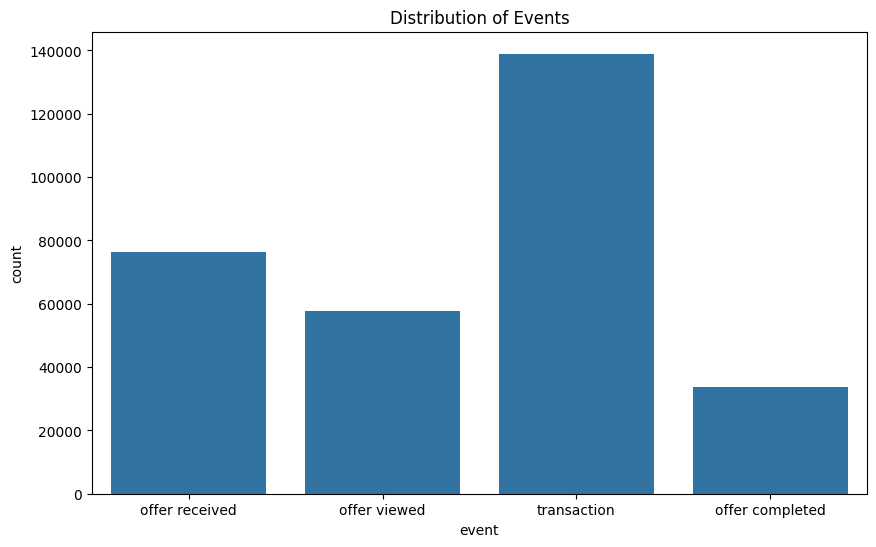

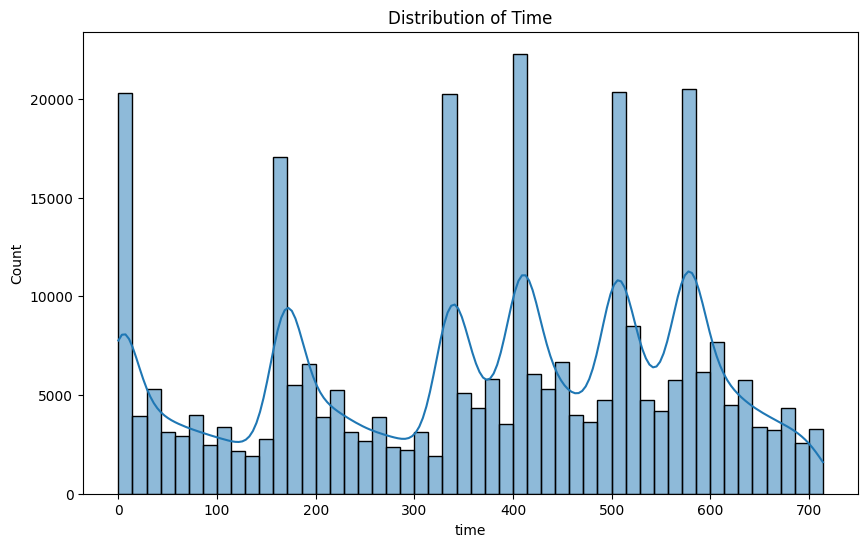

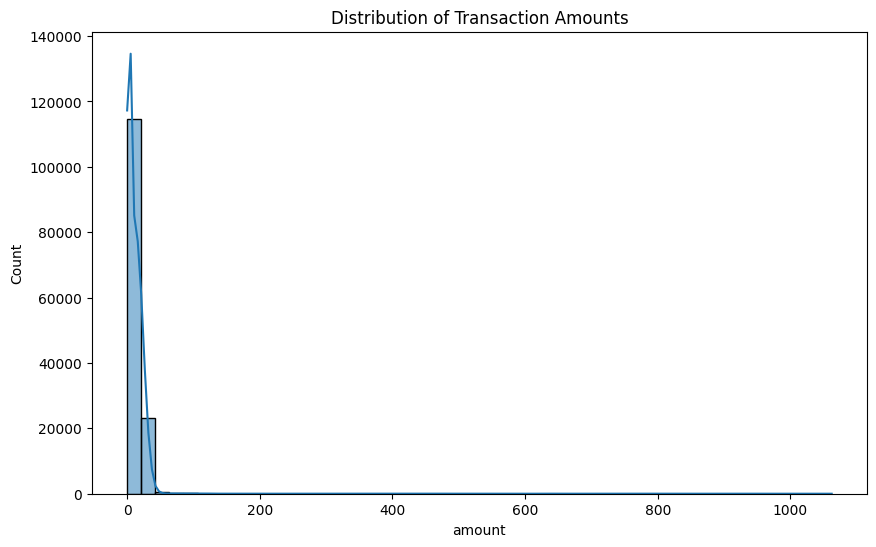

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(transcript.describe(include='all'))

# Check for missing values
print(transcript.isnull().sum())

# Plot the distribution of events
plt.figure(figsize=(10, 6))
sns.countplot(data=transcript, x='event')
plt.title('Distribution of Events')
plt.show()

# Plot the distribution of time
plt.figure(figsize=(10, 6))
sns.histplot(transcript['time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.show()

# Plot the distribution of amount (for transactions only)
plt.figure(figsize=(10, 6))
sns.histplot(transcript[transcript['event'] == 'transaction']['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

## Analysis per offer_id

                                 person         \
                                  count unique   
offer id                                         
0b1e1539f2cc45b7b9fa7c272da2e1d7  10331   6374   
2298d6c36e964ae4a3e7e9706d1fb8c2  14983   6325   
2906b810c7d4411798c6938adc9daaa5  11750   6285   
3f207df678b143eea3cee63160fa8bed  11761   6331   
4d5c57ea9a6940dd891ad53e9dbe8da0  14891   6330   
5a8bc65990b245e5a138643cd4eb9837  14305   6320   
9b98b8c7a33c4b65b9aebfe6a799e6d9  11848   6355   
ae264e3637204a6fb9bb56bc8210ddfd  14374   6374   
f19421c1d4aa40978ebb69ca19b0e20d  14835   6262   
fafdcd668e3743c1bb461111dcafc2a4  14924   6332   

                                                                              \
                                                               top freq mean   
offer id                                                                       
0b1e1539f2cc45b7b9fa7c272da2e1d7  8ed66913c59348ca9e5ff003863ff830    6  NaN   
2298d6c36e964ae4a3e7e9706d1fb

/tmp/ipykernel_9550/1672509750.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(grouped.apply(lambda x: x.isnull().sum()))


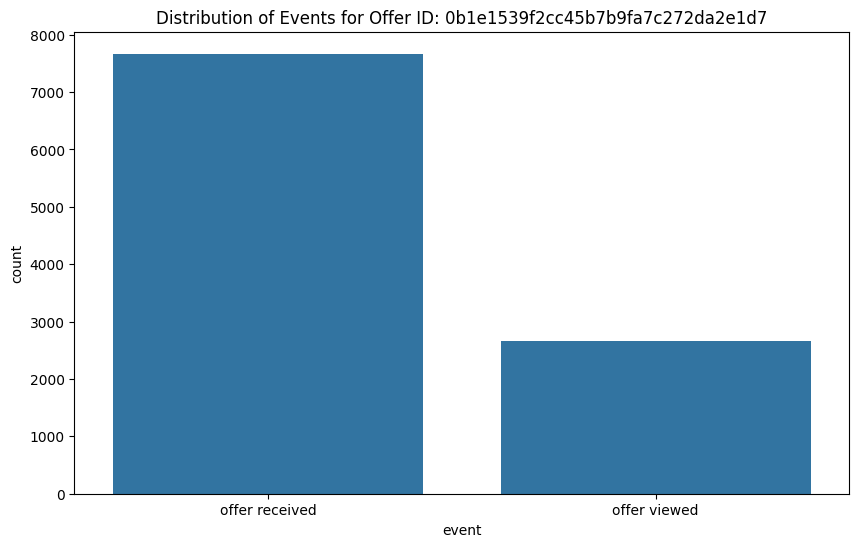

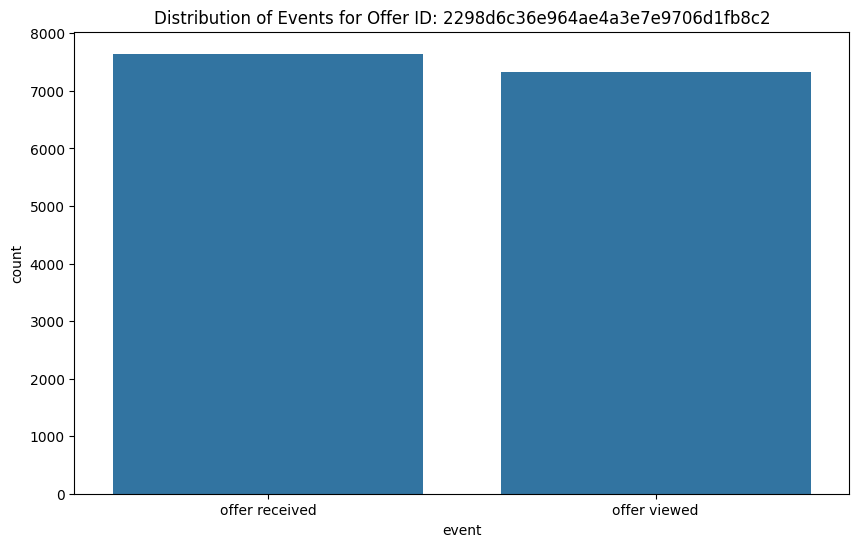

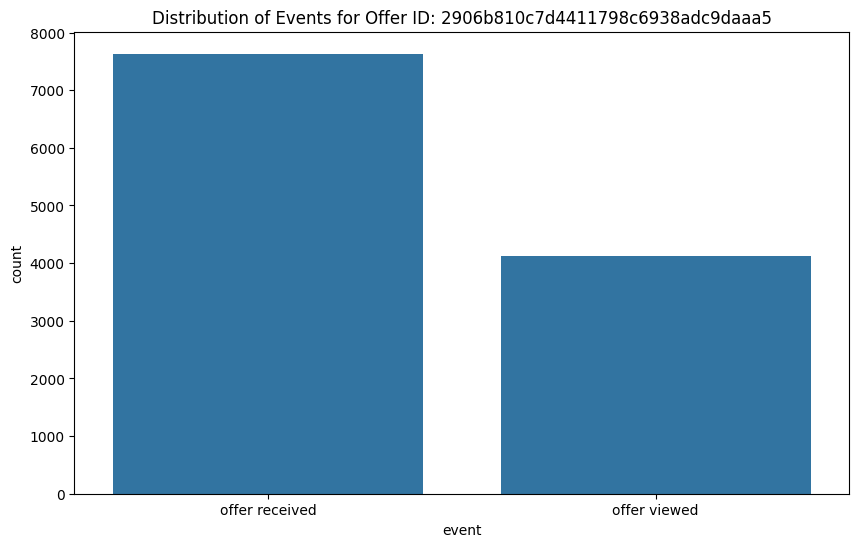

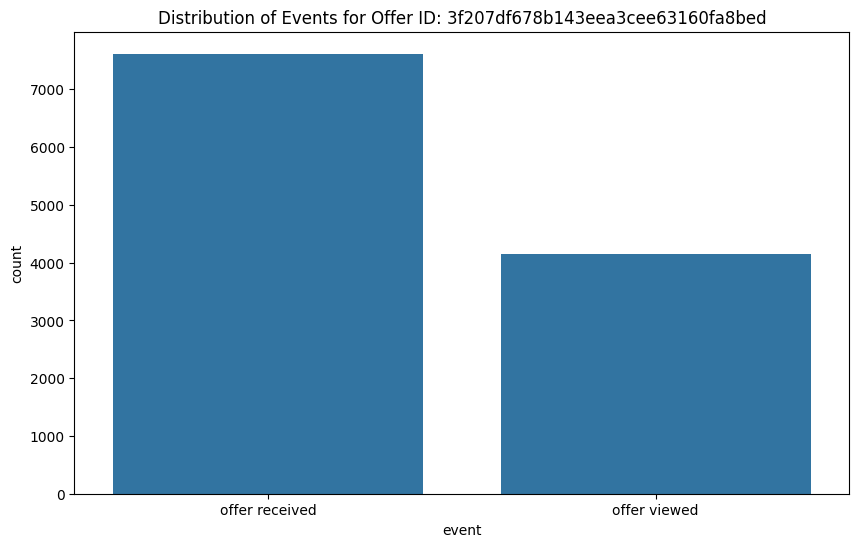

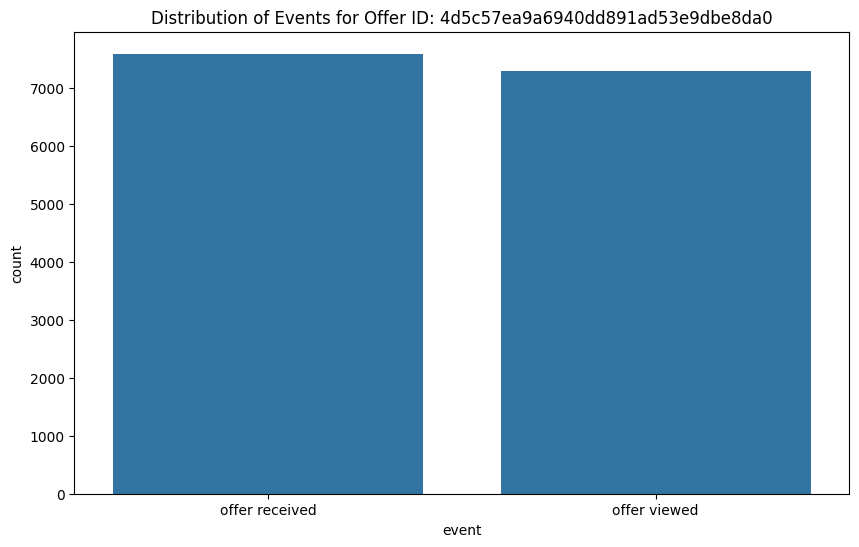

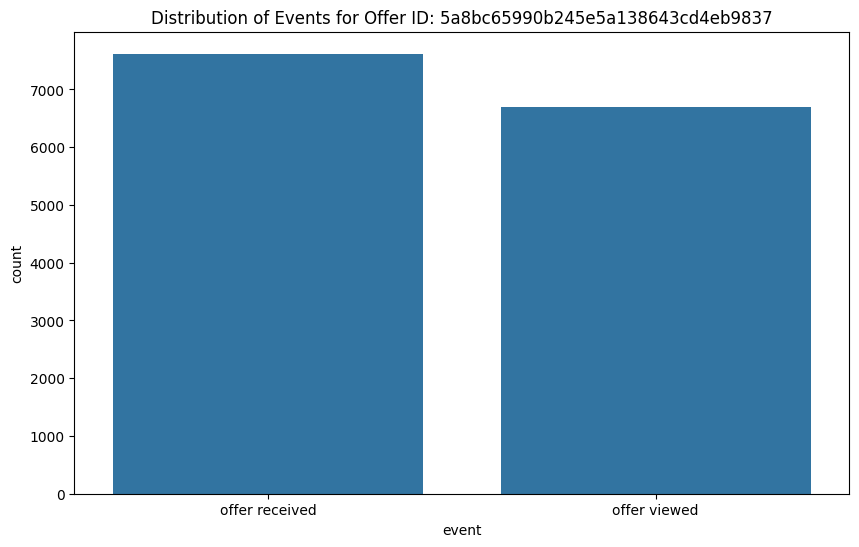

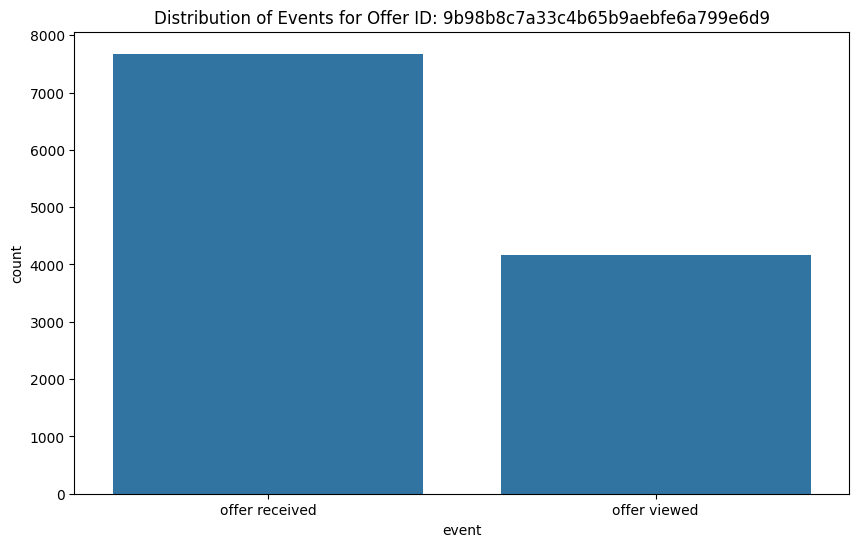

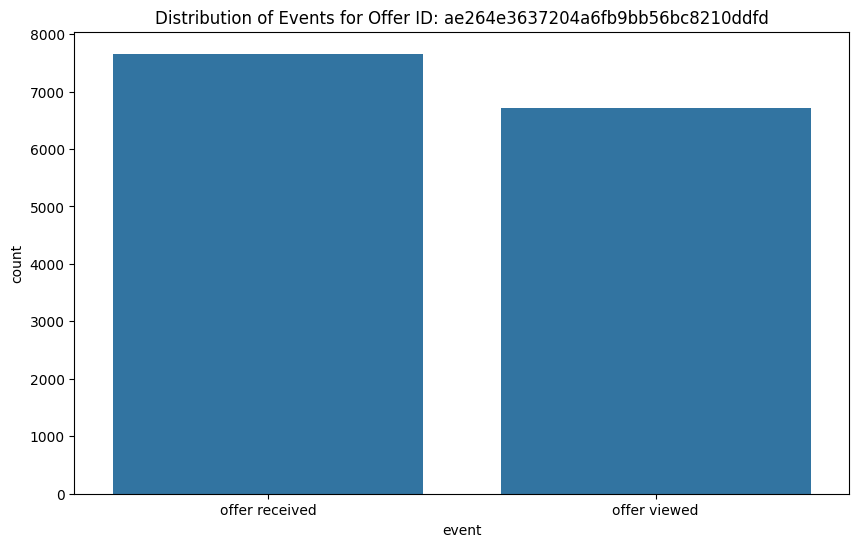

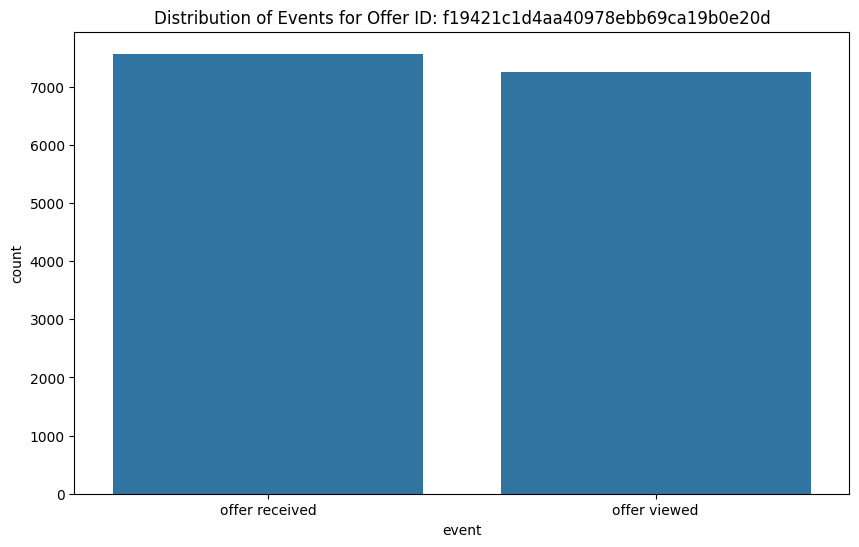

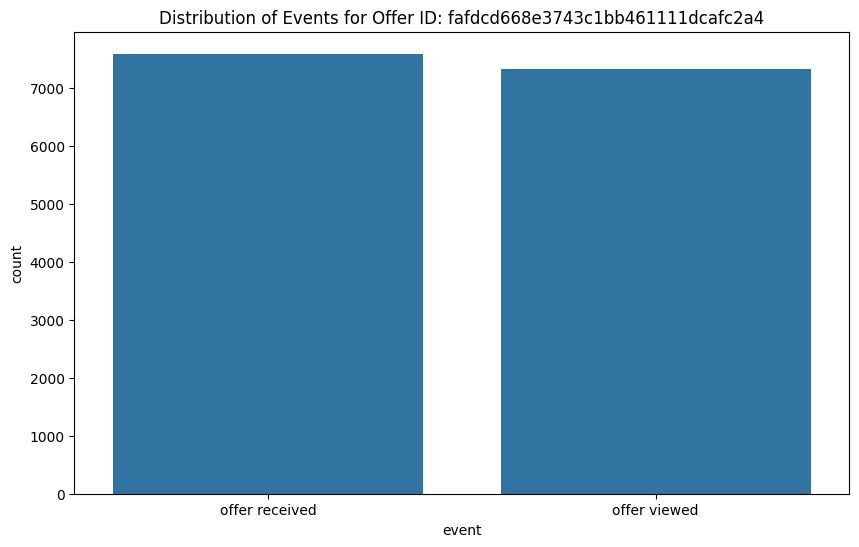

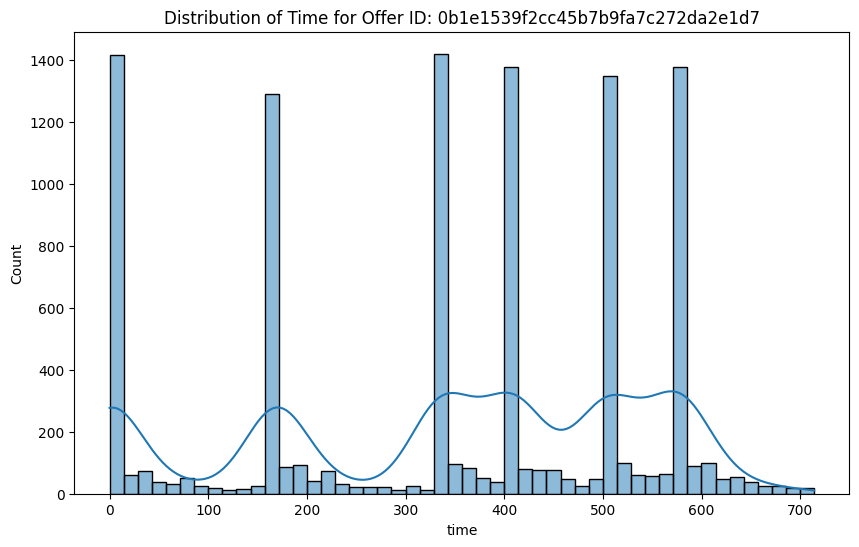

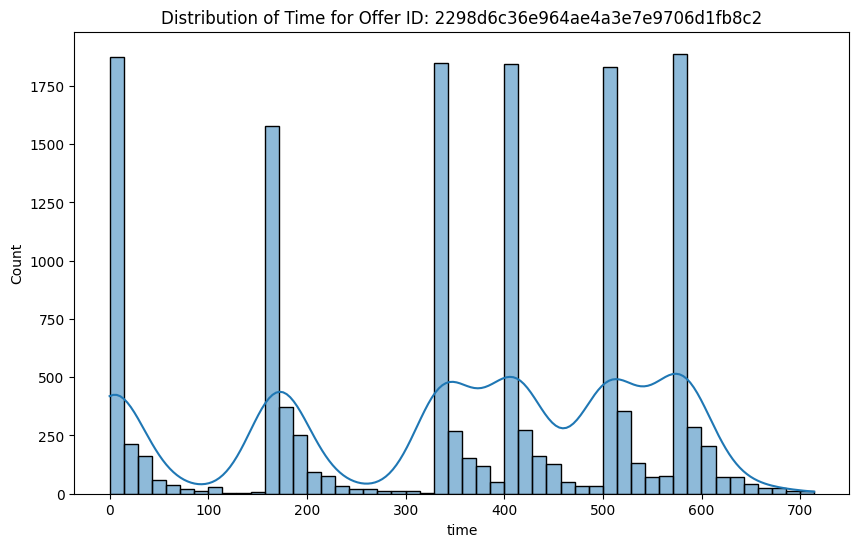

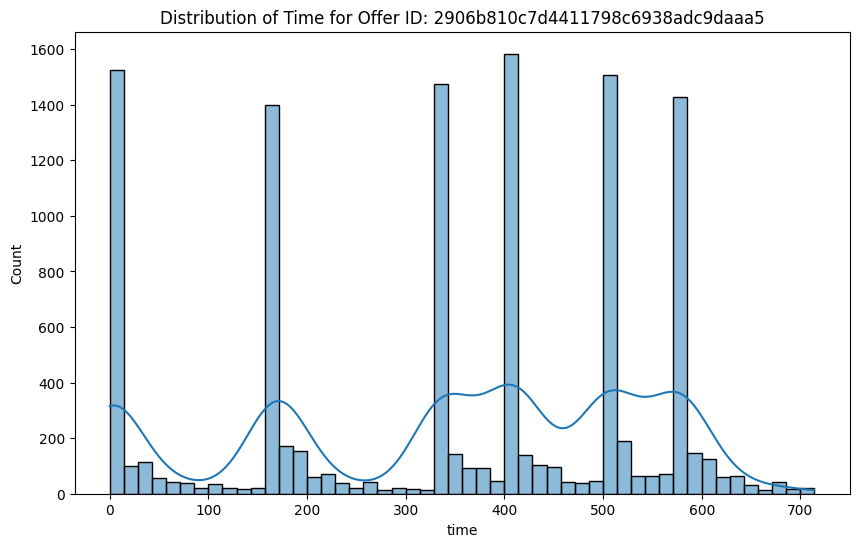

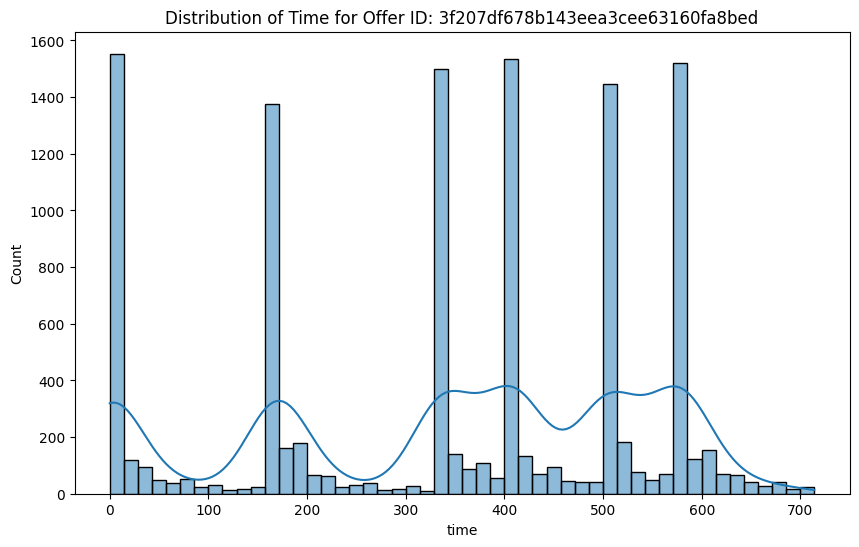

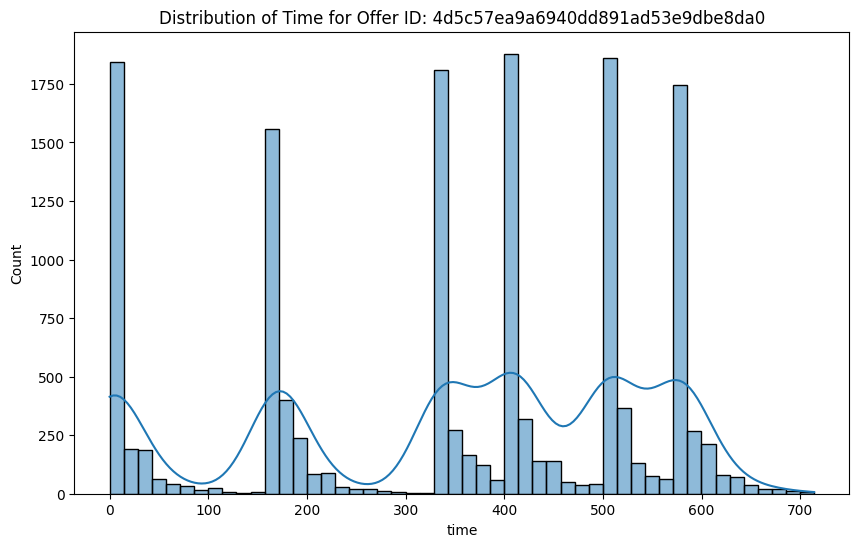

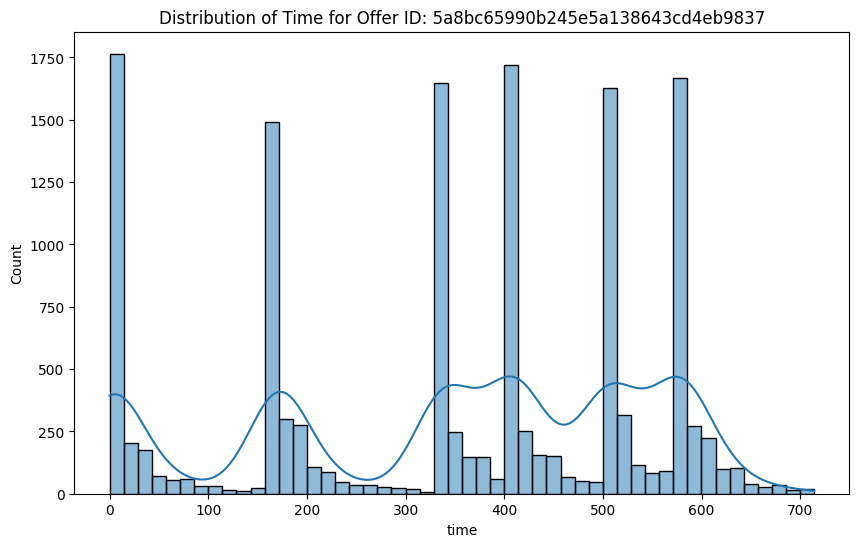

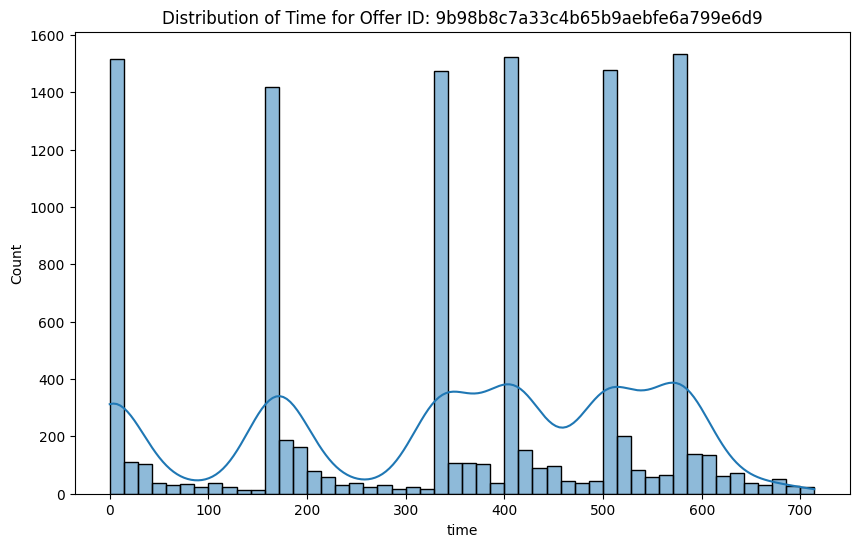

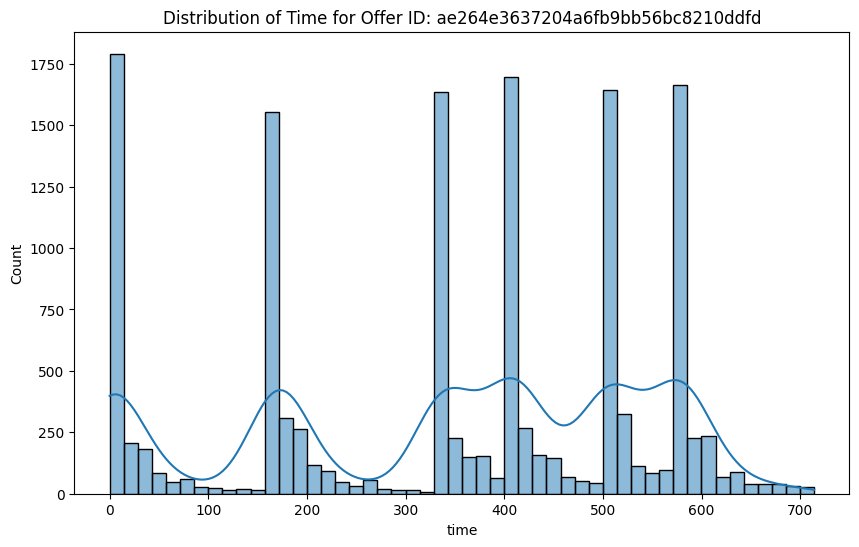

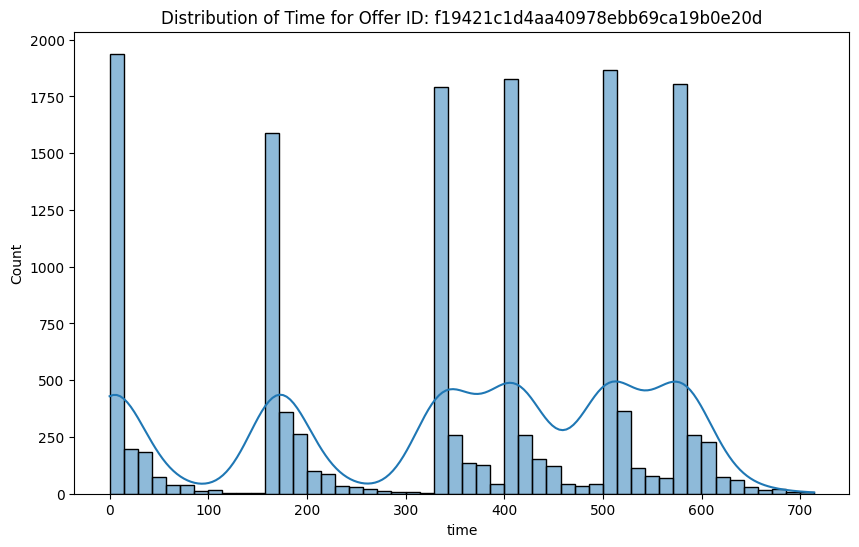

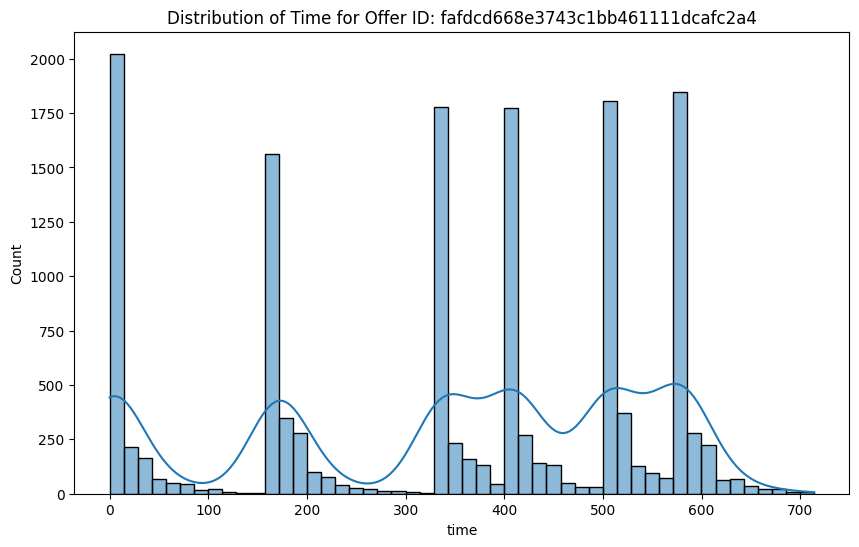

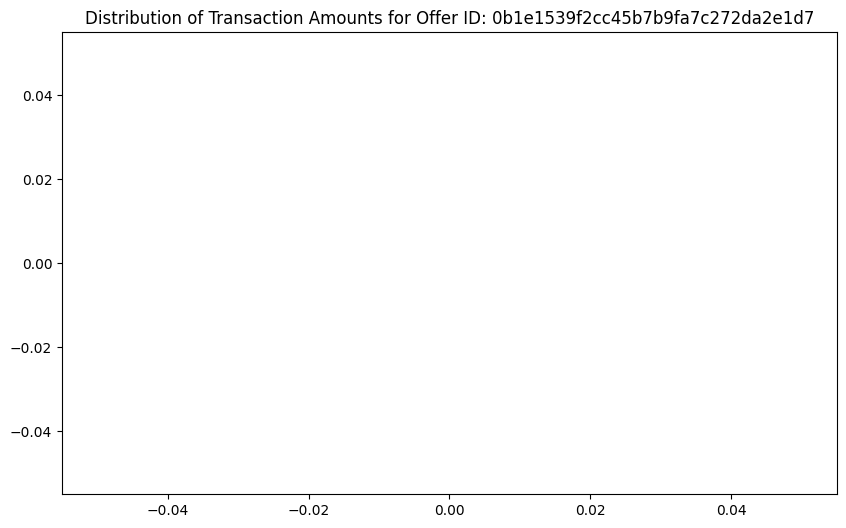

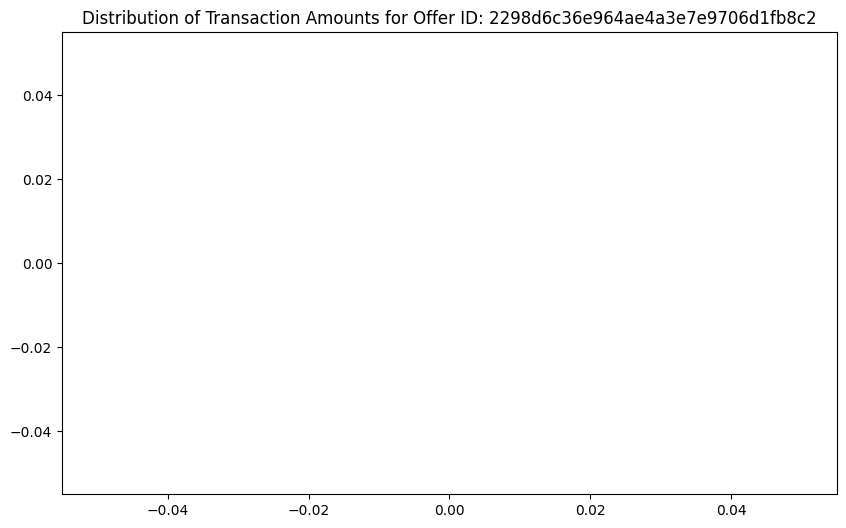

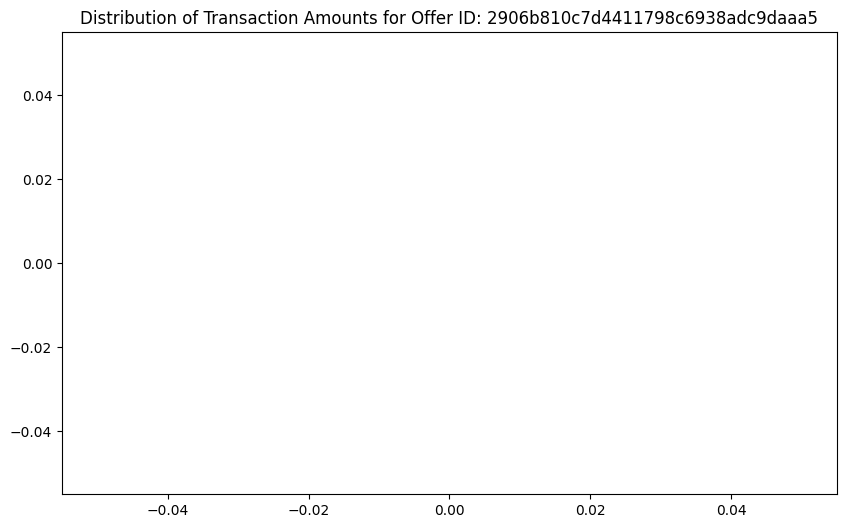

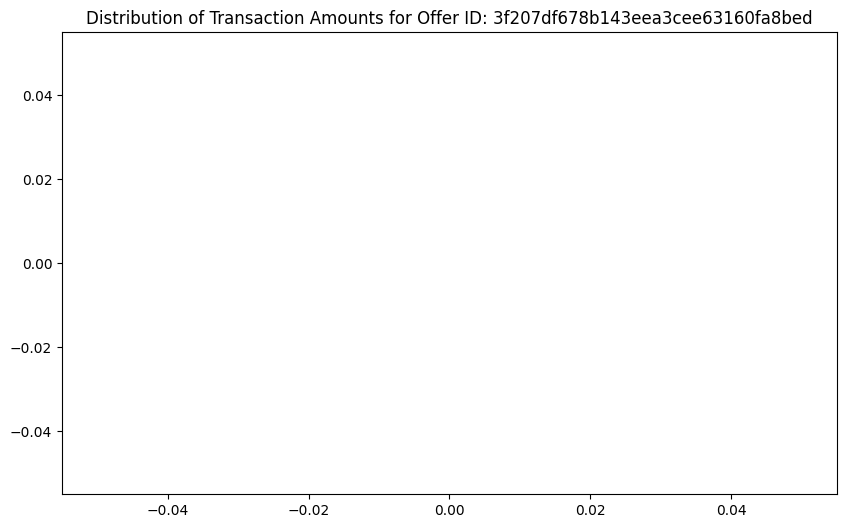

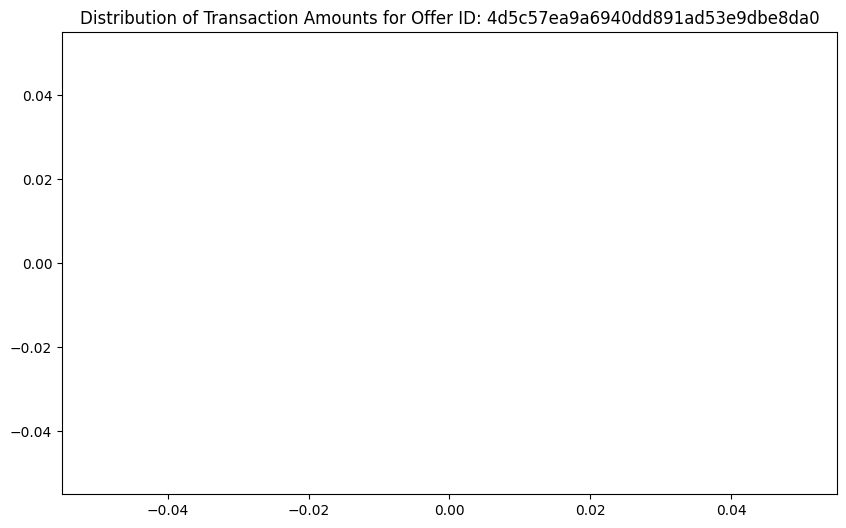

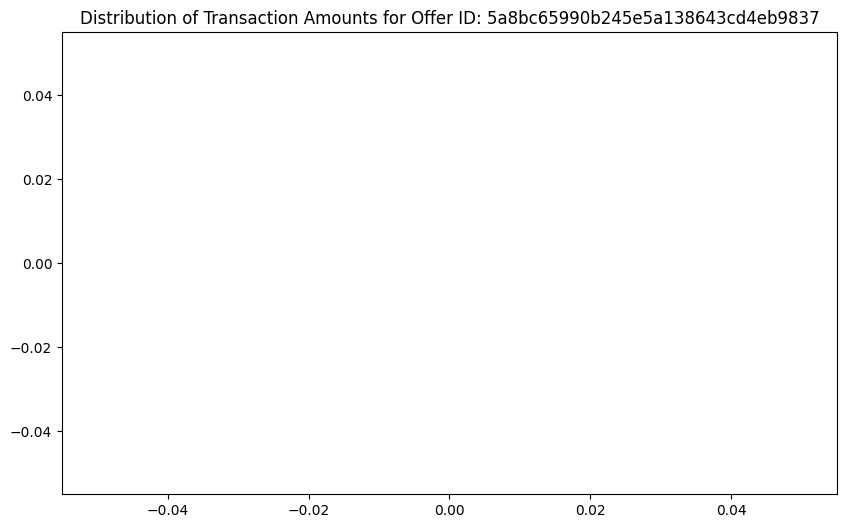

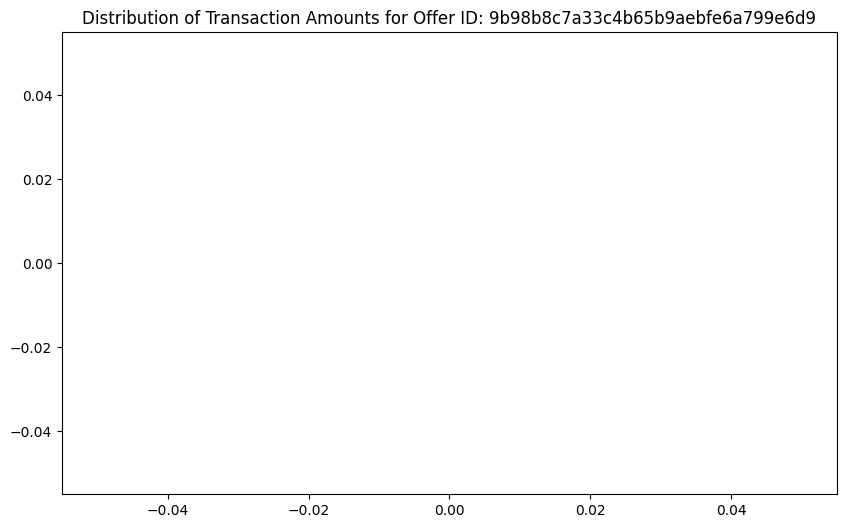

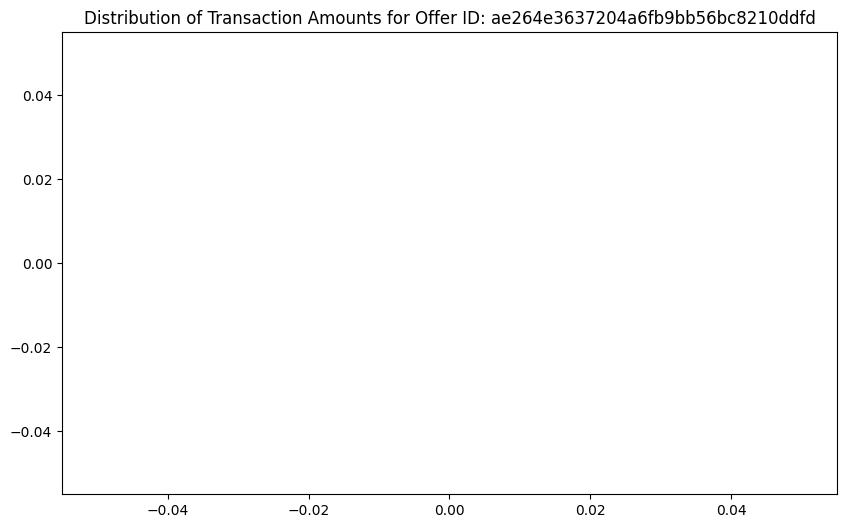

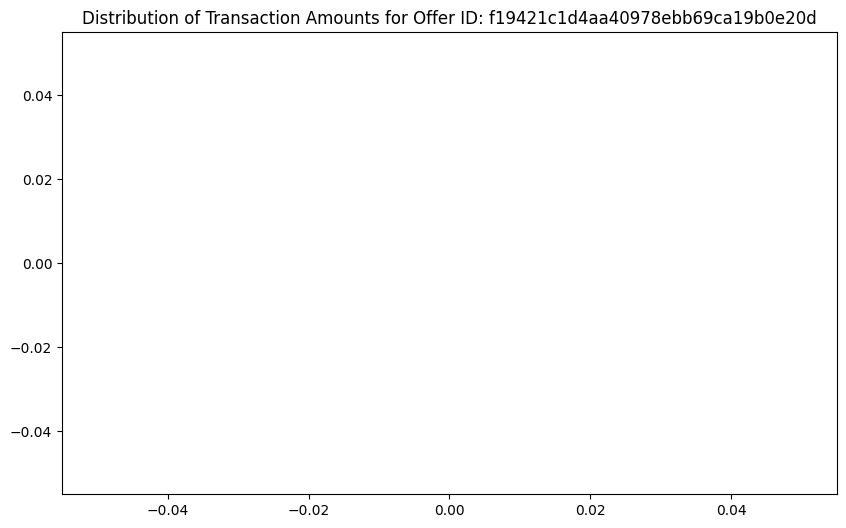

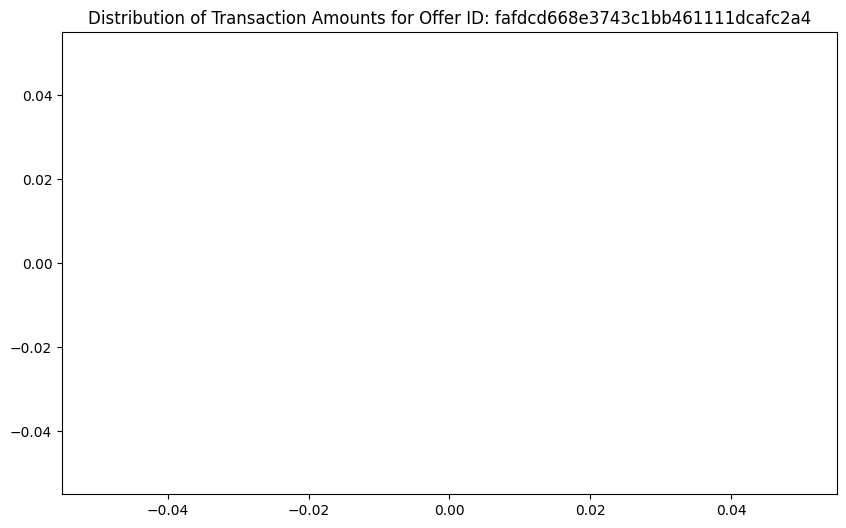

In [8]:
# Group by 'offer id'
grouped = transcript.groupby('offer id')

# Display basic statistics for each group
print(grouped.describe(include='all'))

# Check for missing values in each group
print(grouped.apply(lambda x: x.isnull().sum()))

# Plot the distribution of events for each group
for offer_id, group in grouped:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=group, x='event')
    plt.title(f'Distribution of Events for Offer ID: {offer_id}')
    plt.show()

# Plot the distribution of time for each group
for offer_id, group in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(group['time'], bins=50, kde=True)
    plt.title(f'Distribution of Time for Offer ID: {offer_id}')
    plt.show()

# Plot the distribution of amount (for transactions only) for each group
for offer_id, group in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(group[group['event'] == 'transaction']['amount'], bins=50, kde=True)
    plt.title(f'Distribution of Transaction Amounts for Offer ID: {offer_id}')
    plt.show()